<a href="https://colab.research.google.com/github/za-24/assignment-programming/blob/main/PROGRAMMING_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (if needed)
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Upload your file
from google.colab import files
uploaded = files.upload()

# Load dataset
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

# Preview
df.head()



Saving nurse_attrition (2).csv to nurse_attrition (2).csv


,EmployeeID,Age,Gender,MaritalStatus,Education,Department,JobRole,HourlyRate,YearsAtCompany,YearsInCurrRole,DistanceFromHome,BusinessTravel,WorkLifeBalance,YearsLastPromotion,YearsCurrManager,Attrition
0,1313919,41,Female,Single,2,Cardiology,Nurse,47.0,6,4,1,Rarely,1,0,5,No
1,1200302,49,Male,Married,1,Maternity,Other,30.5,10,7,8,Frequently,3,1,7,No
2,1060315,37,Male,Single,2,Maternity,Nurse,46.0,0,0,2,Rarely,3,0,0,Yes
3,1272912,33,Female,Married,4,Maternity,Other,28.0,8,7,3,Frequently,3,3,0,No
4,1414939,27,Male,Married,1,Maternity,Nurse,20.0,2,2,2,Rarely,3,2,2,No


In [ ]:
# Check basic info
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Value counts of target
print("\nAttrition breakdown:\n", df['Attrition'].value_counts())

# Convert target to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   MaritalStatus       500 non-null    object 
 4   Education           500 non-null    int64  
 5   Department          500 non-null    object 
 6   JobRole             500 non-null    object 
 7   HourlyRate          500 non-null    float64
 8   YearsAtCompany      500 non-null    int64  
 9   YearsInCurrRole     500 non-null    int64  
 10  DistanceFromHome    500 non-null    int64  
 11  BusinessTravel      500 non-null    object 
 12  WorkLifeBalance     500 non-null    int64  
 13  YearsLastPromotion  500 non-null    int64  
 14  YearsCurrManager    500 non-null    int64  
 15  Attrition           500 non-null    object 
dtypes: float

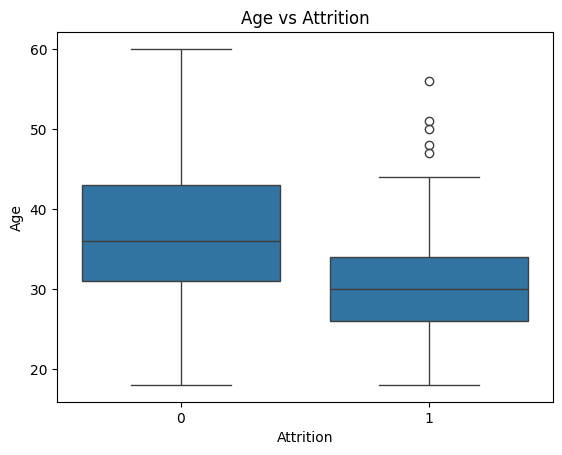

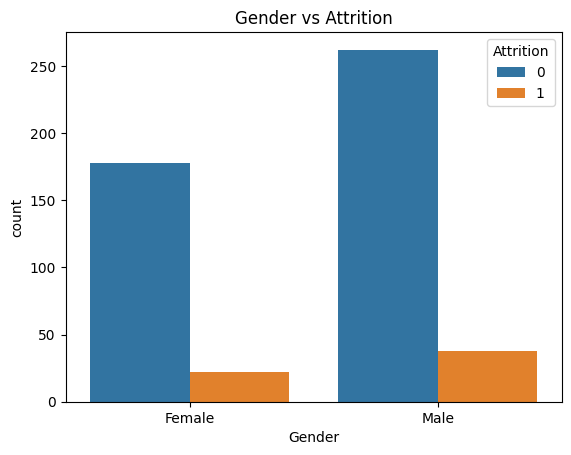

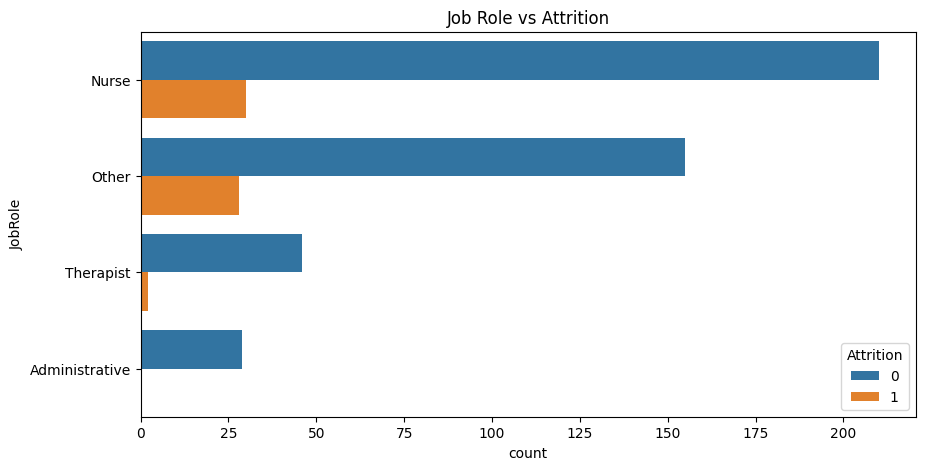

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()

# Gender distribution
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Gender vs Attrition")
plt.show()

# JobRole distribution
plt.figure(figsize=(10,5))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title("Job Role vs Attrition")
plt.show()


In [ ]:
# Drop EmployeeID (not useful for prediction)
df.drop('EmployeeID', axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


KeyError: "['EmployeeID'] not found in axis"

In [ ]:
# Drop EmployeeID (not useful for prediction)
df.drop('EmployeeID', axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


KeyError: "['EmployeeID'] not found in axis"

In [ ]:

# Drop EmployeeID (not useful for prediction)
df = df.drop(columns=['EmployeeID'], errors='ignore')
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))


[[130   3]
 [ 15   2]]

               precision    recall  f1-score   support

           0       0.90      0.98      0.94       133
           1       0.40      0.12      0.18        17

    accuracy                           0.88       150
   macro avg       0.65      0.55      0.56       150
weighted avg       0.84      0.88      0.85       150



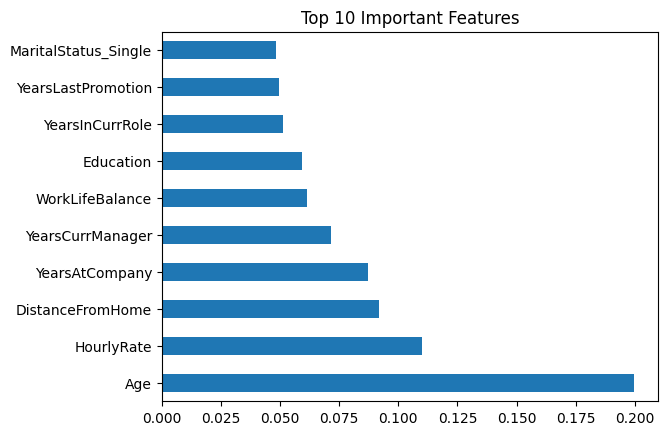

In [ ]:
import numpy as np

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log))


Logistic Regression Confusion Matrix:
[[130   3]
 [ 15   2]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       133
           1       0.40      0.12      0.18        17

    accuracy                           0.88       150
   macro avg       0.65      0.55      0.56       150
weighted avg       0.84      0.88      0.85       150

ROC AUC Score: 0.5475453339230429


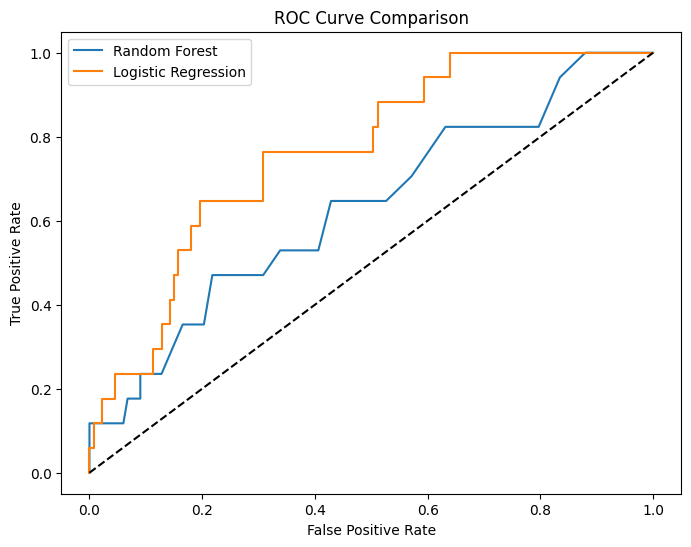

In [ ]:
from sklearn.metrics import roc_curve

# Get probabilities
rf_probs = model.predict_proba(X_test)[:,1]
log_probs = log_model.predict_proba(X_test)[:,1]

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
